# Final Project Part - II  

## (No late submissions accepted)

### In this part II, you will be performing different analytics using the related "cc23_" tables and data you created in your postgres SSO dsa_student database in Part I.

You will be designing and executing a variety of queries on the Chicago crime database tables - hints included. 

It is your choice how you connect to your dsa_student SSO database and successfully implement the queries for answering each question.


In [1]:
#CONNETION HERE
%load_ext sql
import pandas as pd
import getpass
import psycopg2
import numpy as np
from psycopg2.extensions import adapt, register_adapter, AsIs

#CONNECTION STRING HERE
password = getpass.getpass()

connection = psycopg2.connect(database = 'dsa_student',
                              user = 'jsmm8',
                              host = 'pgsql.dsa.lan',
                              password = password)
cursor = connection.cursor()

········


### 1- Construct a query to retrieve a count of the primary descriptions of case incidents for all years in descending order. 
<span style="font-size:7px"><b>Hint:</b> 35 rows affected -- data[PUBLIC PEACE VIOLATION=52825]</span>

In [2]:
cursor.execute(
    '''
    SELECT
        iucr_primary_desc,
        COUNT(*) as cnt
    FROM
        cc23_cases
    JOIN
        cc23_iucr_codes_primary_descriptions
            USING(iucr_code)
    GROUP BY
        iucr_primary_desc
    ORDER BY
        cnt DESC;''')

data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
pd.DataFrame(data, columns=columns)

,iucr_primary_desc,cnt
0,THEFT,1674591
1,BATTERY,1448353
2,CRIMINAL DAMAGE,904285
3,NARCOTICS,750415
4,ASSAULT,520256
5,OTHER OFFENSE,492055
6,BURGLARY,428461
7,MOTOR VEHICLE THEFT,391526
8,DECEPTIVE PRACTICE,354858
9,ROBBERY,298804


### 2- Construct a query to retrieve a count of the primary descriptions of case incidents for all years and arrest is TRUE in descending order. 
<span style="font-size:7px"><b>Hint:</b> 35 rows affected -- data[ARSON=1637]</span>

In [3]:
cursor.execute('''
    SELECT
        iucr_primary_desc,
        COUNT(*) AS count
    FROM jsmm8.cc23_cases
    JOIN jsmm8.cc23_iucr_codes_primary_descriptions
        ON jsmm8.cc23_cases.iucr_code = jsmm8.cc23_iucr_codes_primary_descriptions.iucr_code
    WHERE jsmm8.cc23_cases.arrest = TRUE
    GROUP BY 
        iucr_primary_desc
    ORDER BY 
        count DESC;
''')

data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
pd.DataFrame(data, columns=columns)

,iucr_primary_desc,count
0,NARCOTICS,745744
1,BATTERY,316985
2,THEFT,185162
3,CRIMINAL TRESPASS,150955
4,ASSAULT,109105
5,OTHER OFFENSE,86299
6,WEAPONS VIOLATION,81688
7,PROSTITUTION,69666
8,CRIMINAL DAMAGE,60094
9,DECEPTIVE PRACTICE,46724


### 3- Construct a query to retrieve the count of case incidents, count and percent (rounded to 3 decimal places) of arrests for each year;  order descending by arrested percent.
<span style="font-size:7px"><b>Hint:</b> 23 rows affected -- data[2015=26.449%] -- parse dates, uses "case when"</span>

In [4]:
cursor.execute('''
    SELECT
        CAST(EXTRACT(YEAR FROM incident_date) AS INTEGER) AS year,
        COUNT(*) AS total_incidents,
        SUM(CASE WHEN arrest = TRUE THEN 1 ELSE 0 END) AS total_arrests,
        ROUND(SUM(CASE WHEN arrest = TRUE THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 3) AS arrested_percent
    FROM jsmm8.cc23_cases
    GROUP BY 
        year
    ORDER BY 
        arrested_percent DESC;
''')

data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
pd.DataFrame(data, columns=columns)

,year,total_incidents,total_arrests,arrested_percent
0,2005,453766,140920,31.056
1,2004,469416,144698,30.825
2,2006,448161,135411,30.215
3,2007,437073,131869,30.171
4,2003,475953,141564,29.743
5,2001,485875,141920,29.209
6,2002,486788,141557,29.080
7,2014,275790,79643,28.878
8,2009,392809,110817,28.211
9,2013,307529,86553,28.145


### 4- Construct a query to retrieve the list of iucr codes and index code with their matching primary and secondary descriptions that do not appear as an iucr code for the cases.
<span style="font-size:7px"><b>Hint:</b> 15 rows affected -- data[1694, N, GAMBLING, POLICY/OFFICE]</span>

In [5]:
cursor.execute('''
    SELECT
        iucr.iucr_code,
        iucr.iucr_index_code,
        iucr_primary.iucr_primary_desc,
        iucr_secondary.iucr_secondary_desc
    FROM jsmm8.cc23_iucr_codes iucr
    LEFT JOIN jsmm8.cc23_iucr_codes_primary_descriptions iucr_primary
        ON iucr.iucr_code = iucr_primary.iucr_code
    LEFT JOIN jsmm8.cc23_iucr_codes_secondary_descriptions iucr_secondary
        ON iucr.iucr_code = iucr_secondary.iucr_code
    LEFT JOIN jsmm8.cc23_cases cases
        ON iucr.iucr_code = cases.iucr_code
    WHERE cases.iucr_code IS NULL;
''')

data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
pd.DataFrame(data, columns=columns)

,iucr_code,iucr_index_code,iucr_primary_desc,iucr_secondary_desc
0,1694,N,GAMBLING,POLICY/OFFICE
1,1623,N,GAMBLING,BOLITA OR BOLI PUL/STATION
2,1692,N,GAMBLING,POLICY/RUNNER
3,1695,N,GAMBLING,POLICY/PRESS
4,1475,N,WEAPONS VIOLATION,SALE OF METAL PIERCING BULLETS
5,4410,N,OTHER OFFENSE,DESTRUCTION OF DRAFT CARD
6,1691,N,GAMBLING,POLICY/STATION
7,1690,N,GAMBLING,POLICY/HOUSEBOOK
8,1632,N,GAMBLING,WIREROOM/NUMBERS
9,0491,I,RITUALISM,AGG RITUAL MUT:OTHER FIREARM


### 5- For each year, which month is ranked #1 as having the greatest number of crime incidents with a primary crime description containing the term "NARCOTICS" or secondary crime desciption containing the phrase "GUN"? Display the year, month, of the cases incident date, the primary and secondary crime description, the count of incidents and the ranking number. Order by year in descending order.

<span style="font-size:7px"><b>Hint:</b>23 rows affected -- data[2012-2, incidents=1942] ranking# should all be 1 -- involves parsing dates, a nested query with a window function and groups</span>

In [6]:
cursor.execute('''
    SELECT
        year,
        month,
        MAX(incident_count) AS max_incident_count
    FROM (
        SELECT
            CAST(EXTRACT(YEAR FROM incident_date::timestamp) AS INTEGER) AS year,
            CAST(EXTRACT(MONTH FROM incident_date::timestamp) AS INTEGER) AS month,
            iucr_primary_desc,
            iucr_secondary_desc,
            COUNT(*) AS incident_count,
            RANK() OVER (PARTITION BY CAST(EXTRACT(YEAR FROM incident_date::timestamp) AS INTEGER) ORDER BY COUNT(*) DESC) AS ranking
        FROM jsmm8.cc23_cases
        LEFT JOIN jsmm8.cc23_iucr_codes_primary_descriptions AS primary_desc
            ON jsmm8.cc23_cases.iucr_code = primary_desc.iucr_code
        LEFT JOIN jsmm8.cc23_iucr_codes_secondary_descriptions AS secondary_desc
            ON jsmm8.cc23_cases.iucr_code = secondary_desc.iucr_code
        WHERE
            (primary_desc.iucr_primary_desc LIKE '%NARCOTICS%' OR secondary_desc.iucr_secondary_desc LIKE '%GUN%')
        GROUP BY year, month, iucr_primary_desc, iucr_secondary_desc
    ) AS subquery
    WHERE ranking = 1
    GROUP BY year, month
    ORDER BY year DESC, month DESC;

''')

data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
pd.DataFrame(data, columns=columns)

,year,month,max_incident_count
0,2023,8,672
1,2022,5,652
2,2021,6,617
3,2020,8,623
4,2019,7,455
5,2018,7,375
6,2017,1,458
7,2016,3,559
8,2015,3,1115
9,2014,7,1253


### 6 What is the average difference (in days, expressed as an integer) between the updated and incident dates for case arrests and primary and secondary crime descriptions ordered by the average difference in days.

<span style="font-size:7px"><b>Hint:</b>HINT: 388 rows affected -- output first row data[INTIMIDATION,AGGRAVATED INTIMIDATION,True,19] -- Involves Aggregate groups, parse date, calculate date difference</span>

In [7]:
cursor.execute('''

    SELECT
        p.iucr_primary_desc AS primary_description,
        s.iucr_secondary_desc AS secondary_description,
        c.arrest,
        AVG(DATE_PART('day', c.updated_on - c.incident_date))::integer AS avg_days_difference
    FROM
        jsmm8.cc23_cases c
    JOIN
        jsmm8.cc23_iucr_codes_primary_descriptions p
        ON c.iucr_code = p.iucr_code
    JOIN
        jsmm8.cc23_iucr_codes_secondary_descriptions s
        ON c.iucr_code = s.iucr_code
    WHERE 
        c.arrest = TRUE
    GROUP BY
        p.iucr_primary_desc,
        s.iucr_secondary_desc,
        c.arrest
    ORDER BY
        avg_days_difference;

''')

data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
pd.DataFrame(data, columns=columns)

,primary_description,secondary_description,arrest,avg_days_difference
0,INTIMIDATION,AGGRAVATED INTIMIDATION,True,19
1,CONCEALED CARRY LICENSE VIOLATION,PROHIBITED PLACES,True,101
2,WEAPONS VIOLATION,USE OF METAL PIERCING BULLETS,True,110
3,NON-CRIMINAL,CONCEALED CARRY LICENSE REVOCATION,True,118
4,OTHER OFFENSE,ARSONIST: DUTY TO REGISTER,True,129
...,...,...,...,...
383,GAMBLING,BOLITA OR BOLI PUL/RUNNER,True,5310
384,NARCOTICS,SALE/DEL HYPODERMIC NEEDLE,True,5360
385,GAMBLING,POLICY/OTHER,True,5494
386,RITUALISM,AGG RITUAL MUT:OTH DANG WEAPON,True,5643


### 7 -- Create a query that will retrieve two time series for crime count and arrest count per year from the database. Visualize these two time series in a single plot. 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

cursor.execute('''
    SELECT
        EXTRACT(YEAR FROM incident_date) AS year,
        COUNT(*) AS crime_count,
        SUM(CASE WHEN arrest THEN 1 ELSE 0 END) AS arrest_count
    FROM jsmm8.cc23_cases
    GROUP BY year
    ORDER BY year;
''')

data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns=columns)

In [9]:
df.set_index('year', inplace=True)

df['crime_rate'] = df['crime_count'] / df['crime_count'].max()
df['arrest_rate'] = df['arrest_count'] / df['arrest_count'].max()

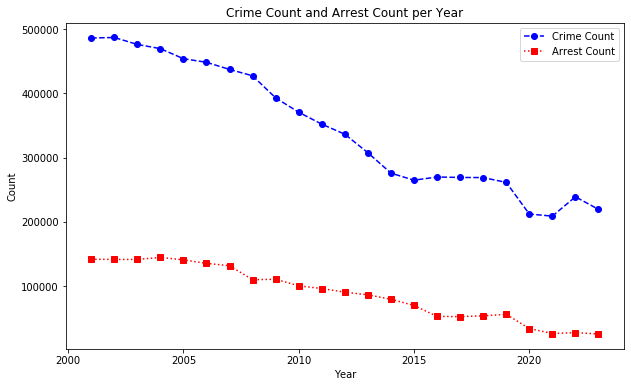

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df.index, df['crime_count'], label='Crime Count', marker='o', linestyle='--', color='b')

ax.plot(df.index, df['arrest_count'], label='Arrest Count', marker='s', linestyle=':', color='r')

ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Crime Count and Arrest Count per Year')

ax.legend()

plt.show()


<hr style="border-top: 5px solid green;" />

## BONUS QUESTIONS - You have the option to work through items 8 and 9 to receive extra-credit points - but extra-credit points will only be awarded after items 1-7 have been completed.  No bonus if items 1-7 are not faithfully attemtped.

<hr style="border-top: 5px solid green;" />

### 8-9 BONUS (5pts each) -- Create up to 2 novel and useful queries that could be potentially used for policing planning, policy making, citizen awareness, etc. of your choosing.

Queries **(added to the "Query Here" cells)** should provide some significant analytic value and insight into the Chicago crime data based on a focused domain question of your choosing. Use your SQL skill-set beyond simple SELECT-FROM-WHERE and use multiple tables. Advanced analytic solutions would include GROUP BY/HAVING, Nested Queries, Aggregation Operators, Window Functions, etc.

Each query should have documentation to explain what this query is attempting to achieve and how it is meaningful and useful for analytic purposes and insight. Add your explanation to the markdown cells below labeled **Documentation/Explanation Here**.

### 8 Documentation/Explanation Here

In [11]:
cursor.execute('''
    SELECT
        cl.community_area,
        COUNT(*) AS crime_count
    FROM jsmm8.cc23_case_location cl
    JOIN jsmm8.cc23_cases c ON cl.case_number = c.case_number
    WHERE EXTRACT(YEAR FROM c.incident_date) = 2023
    GROUP BY cl.community_area
    HAVING COUNT(*) > 100
    ORDER BY crime_count DESC;

''')

data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns=columns)

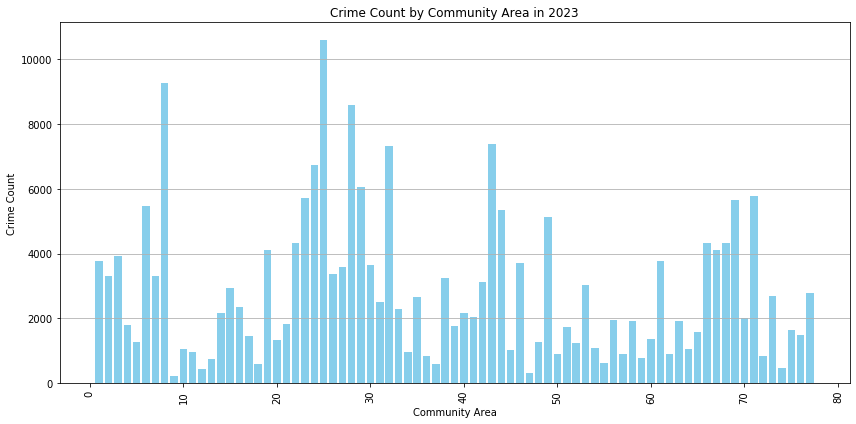

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df['community_area'], df['crime_count'], color='skyblue')
plt.xlabel('Community Area')
plt.ylabel('Crime Count')
plt.title('Crime Count by Community Area in 2023')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### 9 Documentation/Explanation Here

In [13]:
cursor.execute('''
    WITH MonthlyCrimeCounts AS (
    SELECT
        EXTRACT(MONTH FROM incident_date) AS month,
        COUNT(*) AS crime_count
    FROM jsmm8.cc23_cases
    WHERE iucr_code IN (
        SELECT iucr_code FROM jsmm8.cc23_iucr_codes_primary_descriptions
        WHERE iucr_primary_desc LIKE '%NARCOTICS%'
    )
    GROUP BY month
),
TotalCrimeCounts AS (
    SELECT
        EXTRACT(MONTH FROM incident_date) AS month,
        COUNT(*) AS total_count
    FROM jsmm8.cc23_cases
    GROUP BY month
)
SELECT
    m.month,
    m.crime_count,
    t.total_count,
    ROUND((m.crime_count * 100.0) / t.total_count, 2) AS percentage
FROM MonthlyCrimeCounts m
JOIN TotalCrimeCounts t ON m.month = t.month
ORDER BY m.month;
''')

data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(data, columns=columns)

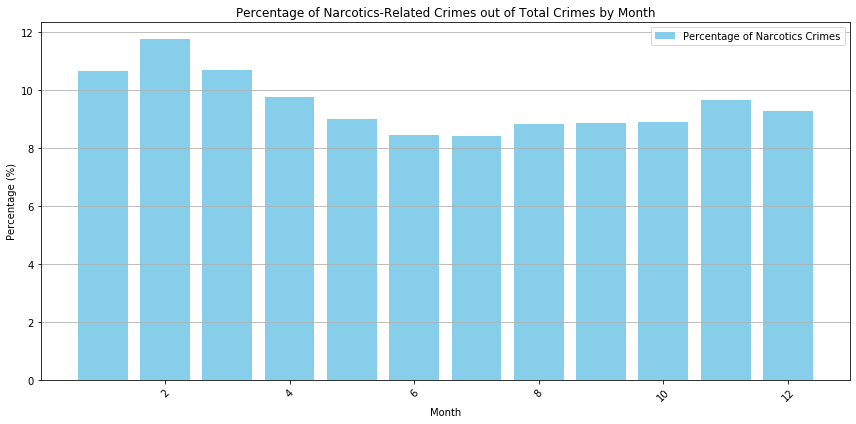

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(df['month'], df['percentage'], color='skyblue', label='Percentage of Narcotics Crimes')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Narcotics-Related Crimes out of Total Crimes by Month')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [15]:
connection.commit()

In [16]:
cursor.close()
connection.close()

# Save your notebook, then `File > Close and Halt`